In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os

# Carga escalado, resize y aumento de los datos

 Asignación de las rutas y cargar las imagenes de los datasets desde directorios de train y test

In [56]:
# Rutas
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Preprocesamiento + aumento de datos para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.5, 1.2]
)

# Solo normalización para test
test_datagen = ImageDataGenerator(rescale=1./255)

# Carga de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4451 images belonging to 6 classes.
Found 945 images belonging to 6 classes.


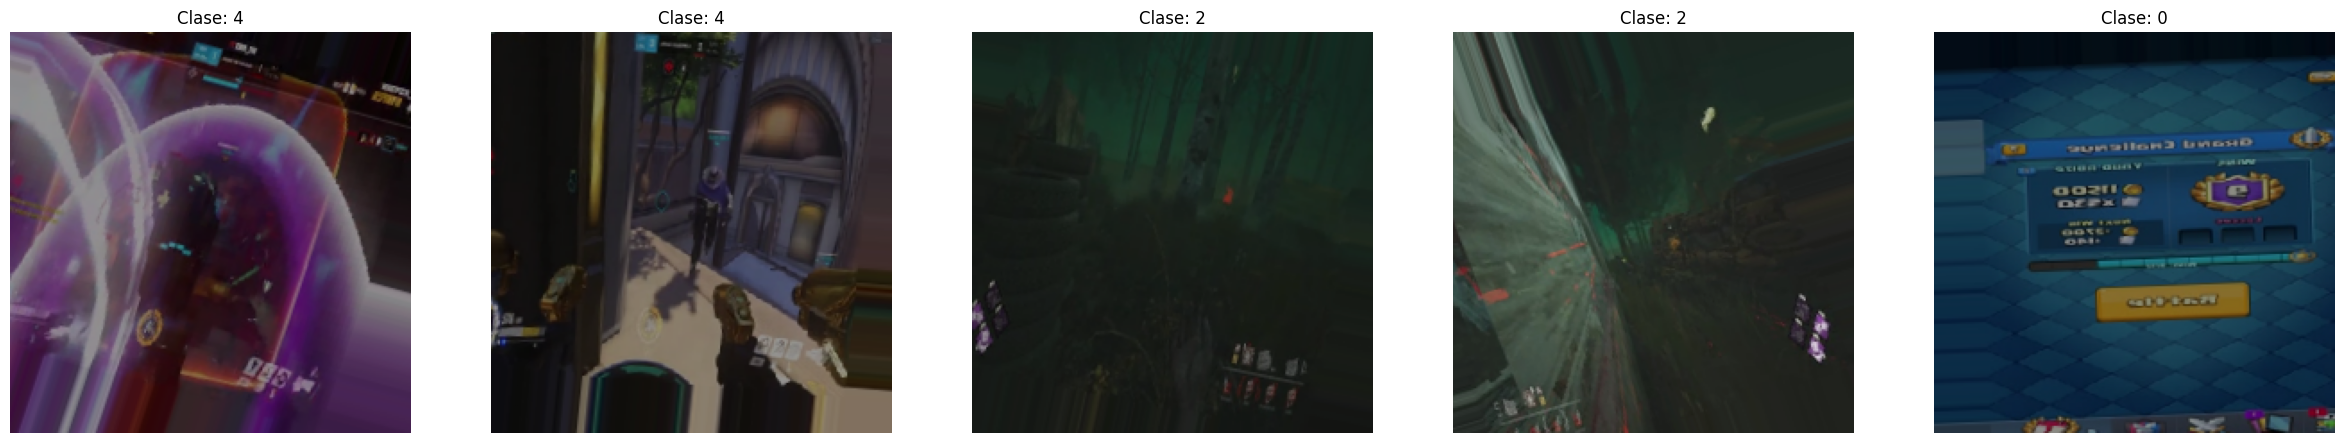

In [57]:
# Visualizar imágenes del primer batch
f, axarr = plt.subplots(1, 5, figsize=(30, 8))
images, labels = train_generator[0]

for i in range(5):
    axarr[i].imshow(images[i])
    axarr[i].set_title(f"Clase: {tf.argmax(labels[i]).numpy()}")
    axarr[i].axis("off")

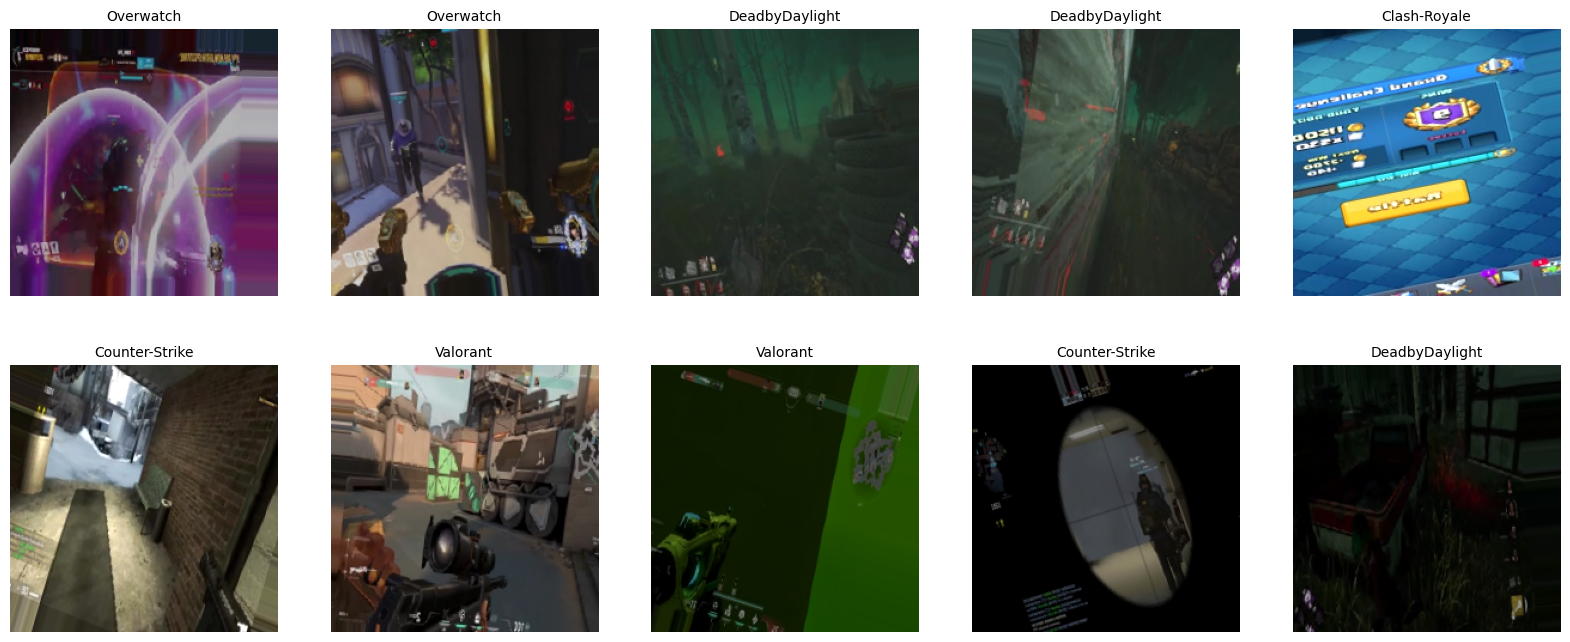

In [58]:
images, labels = train_generator[0]
class_names = list(train_generator.class_indices.keys())

num_images = 10
rows = 2
cols = 5

plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])], fontsize=10)
    plt.axis("off")
